In [9]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

In [10]:
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [14]:
data = load_data('HPL.NS')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-04,190.000000,198.000000,184.250000,189.300003,181.648239,14845911
1,2016-10-05,190.050003,192.899994,185.399994,186.500000,178.961426,929832
2,2016-10-06,186.449997,188.750000,182.000000,182.600006,175.219086,586004
3,2016-10-07,182.949997,184.850006,177.050003,177.699997,170.517136,480833
4,2016-10-10,178.250000,182.800003,176.600006,177.899994,170.709076,609522


In [15]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,190.000000,198.000000,184.250000,189.300003,14845911
1,190.050003,192.899994,185.399994,186.500000,929832
2,186.449997,188.750000,182.000000,182.600006,586004
3,182.949997,184.850006,177.050003,177.699997,480833
4,178.250000,182.800003,176.600006,177.899994,609522


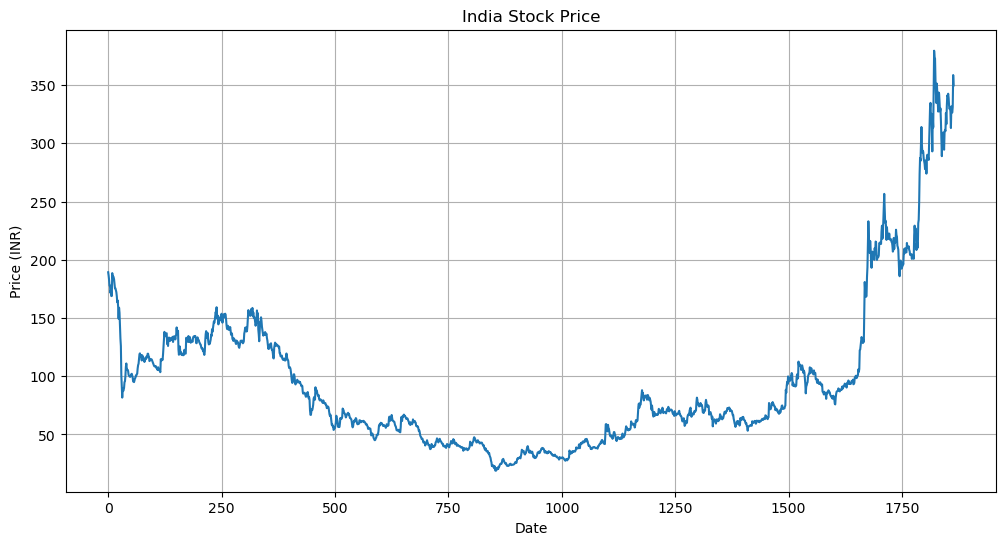

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [18]:
df

,Open,High,Low,Close,Volume
0,190.000000,198.000000,184.250000,189.300003,14845911
1,190.050003,192.899994,185.399994,186.500000,929832
2,186.449997,188.750000,182.000000,182.600006,586004
3,182.949997,184.850006,177.050003,177.699997,480833
4,178.250000,182.800003,176.600006,177.899994,609522
...,...,...,...,...,...
1860,336.000000,338.799988,325.250000,327.250000,293536
1861,321.000000,332.100006,315.000000,326.450012,250173
1862,333.000000,337.399994,328.500000,331.200012,215485
1863,339.799988,364.299988,339.750000,358.649994,2958976


In [19]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1860    287.214499
1861    288.334499
1862    289.537999
1863    291.020999
1864    292.414999
Name: Close, Length: 1865, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

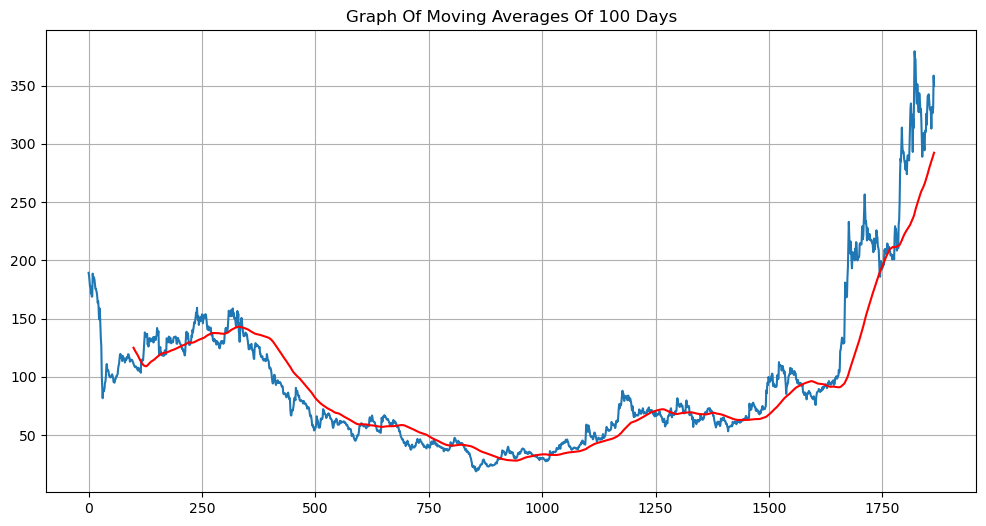

In [21]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

In [22]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
1860    245.83050
1861    246.79450
1862    247.78900
1863    248.92350
1864    250.02975
Name: Close, Length: 1865, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

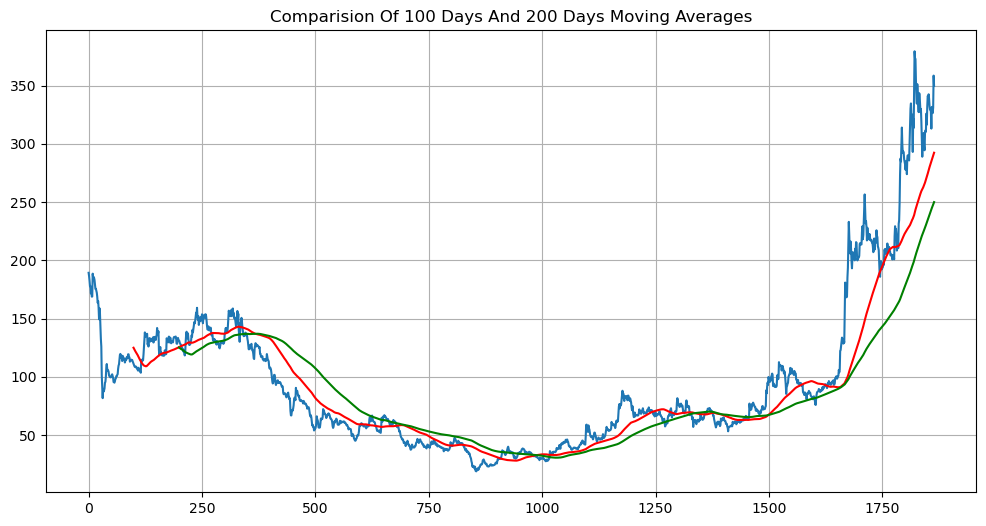

In [23]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [25]:
df.shape

(1865, 5)

# Divide data into training and testing

In [26]:
train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1305, 7)
(560, 7)


In [27]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-10-04,190.000000,198.000000,184.250000,189.300003,181.648239,14845911
1,2016-10-05,190.050003,192.899994,185.399994,186.500000,178.961426,929832
2,2016-10-06,186.449997,188.750000,182.000000,182.600006,175.219086,586004
3,2016-10-07,182.949997,184.850006,177.050003,177.699997,170.517136,480833
4,2016-10-10,178.250000,182.800003,176.600006,177.899994,170.709076,609522


In [28]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
1305,2022-01-14,75.150002,76.300003,73.650002,75.050003,74.554077,198366
1306,2022-01-17,75.550003,79.099998,75.000000,77.000000,76.491188,423599
1307,2022-01-18,77.099998,79.400002,74.500000,74.849998,74.355400,225657
1308,2022-01-19,74.949997,75.800003,74.050003,74.550003,74.057381,108722
1309,2022-01-20,74.550003,76.750000,74.250000,75.349998,74.852097,138642


# Using MinMax scaler for normalization of the dataset


In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [30]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [31]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[1.        ],
       [0.98357288],
       [0.9606923 ],
       ...,
       [0.32883544],
       [0.32414196],
       [0.32707537]])

In [32]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [33]:
x_train.shape

(1205, 100, 1)

# ML Model

In [34]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [35]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 14s 179ms/step - loss: 0.0682 - mean_absolute_error: 0.1905
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 149ms/step - loss: 0.0114 - mean_absolute_error: 0.0733
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0072 - mean_absolute_error: 0.0590
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 136ms/step - loss: 0.0065 - mean_absolute_error: 0.0550
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.0081 - mean_absolute_error: 0.0627
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.0047 - mean_absolute_error: 0.0499
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 138ms/step - loss: 0.0047 - mean_absolute_error: 0.0495
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 0.0045 - mean_absolute_error: 0.0474
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - loss: 0.0053 - mean_absolute_error: 0.0502
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 134ms/step - loss: 0.0071 - mean_absolute_error: 0.0575
Epoch 11/100
38/38

In [38]:
model.save('keras_model.h5')

In [39]:
test_close.shape

(560, 1)

In [42]:
past_100_days = pd.DataFrame(train_close[-100:])

In [43]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [48]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [49]:
final_df.head()

,0
0,65.949997
1,67.000000
2,67.349998
3,67.099998
4,66.949997


In [50]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.03906847],
       [0.04228589],
       [0.04335835],
       [0.0425923 ],
       [0.04213267],
       [0.04320516],
       [0.04136662],
       [0.04243911],
       [0.0471886 ],
       [0.05760686],
       [0.05331699],
       [0.04887391],
       [0.04810786],
       [0.04580972],
       [0.05423625],
       [0.05163169],
       [0.05224452],
       [0.06051784],
       [0.05377662],
       [0.04642255],
       [0.04887391],
       [0.04933355],
       [0.04963996],
       [0.04918033],
       [0.0470354 ],
       [0.0456565 ],
       [0.05147847],
       [0.05699403],
       [0.05377662],
       [0.05331699],
       [0.06281599],
       [0.05561513],
       [0.05086564],
       [0.05561513],
       [0.05408303],
       [0.0551555 ],
       [0.05576835],
       [0.05469589],
       [0.05377662],
       [0.04841428],
       [0.04473725],
       [0.04320516],
       [0.0470354 ],
       [0.03906847],
       [0.05132525],
       [0.04795464],
       [0.0455033 ],
       [0.040

In [51]:
input_data.shape

(660, 1)

# Testing the model

In [52]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [53]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(560, 100, 1)
(560,)


# Making prediction and plotting the graph of predicted vs actual values


In [54]:
# Making predictions

y_pred = model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step


In [55]:
y_pred.shape

(560, 1)

In [56]:
y_test

array([0.06695267, 0.07292784, 0.06633981, 0.06542057, 0.06787191,
       0.06067106, 0.04826106, 0.04963996, 0.04688218, 0.05377662,
       0.05163169, 0.05331699, 0.07292784, 0.08120116, 0.07445994,
       0.06388847, 0.06526735, 0.06312242, 0.06664623, 0.06388847,
       0.04243911, 0.04872069, 0.04872069, 0.04887391, 0.04473725,
       0.03876206, 0.03125479, 0.03692355, 0.01149073, 0.02604566,
       0.02880343, 0.02849701, 0.0298759 , 0.02481997, 0.02175578,
       0.01869158, 0.02589245, 0.0298759 , 0.0298759 , 0.0283438 ,
       0.02527961, 0.02635207, 0.03186762, 0.02956947, 0.04335835,
       0.03983452, 0.03830243, 0.03477862, 0.03064195, 0.03002911,
       0.03416577, 0.0330933 , 0.03952811, 0.04489045, 0.04963996,
       0.04994638, 0.04519686, 0.04918033, 0.05193811, 0.05178489,
       0.05929218, 0.05975179, 0.05852613, 0.05837291, 0.06113069,
       0.05913896, 0.05132525, 0.05561513, 0.05255094, 0.05224452,
       0.05224452, 0.04611613, 0.04090701, 0.04167306, 0.03171

In [57]:
y_pred

array([[0.11137407],
       [0.11211611],
       [0.11206436],
       [0.11140598],
       [0.11030798],
       [0.1089796 ],
       [0.10750273],
       [0.10576387],
       [0.10372116],
       [0.10140866],
       [0.09904304],
       [0.0968326 ],
       [0.09495443],
       [0.09379004],
       [0.09373228],
       [0.094854  ],
       [0.09681258],
       [0.09919408],
       [0.10158607],
       [0.10371663],
       [0.10538527],
       [0.10619822],
       [0.10596921],
       [0.10475878],
       [0.10279928],
       [0.10034256],
       [0.0975807 ],
       [0.094634  ],
       [0.09169386],
       [0.08876523],
       [0.08593696],
       [0.08337338],
       [0.08121176],
       [0.07954736],
       [0.07837567],
       [0.07761174],
       [0.07713525],
       [0.0768975 ],
       [0.07692571],
       [0.07723635],
       [0.07778712],
       [0.07846761],
       [0.07916471],
       [0.07985011],
       [0.08050214],
       [0.08123946],
       [0.08214861],
       [0.083

In [58]:
scaler.scale_

array([0.0030642])

In [59]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

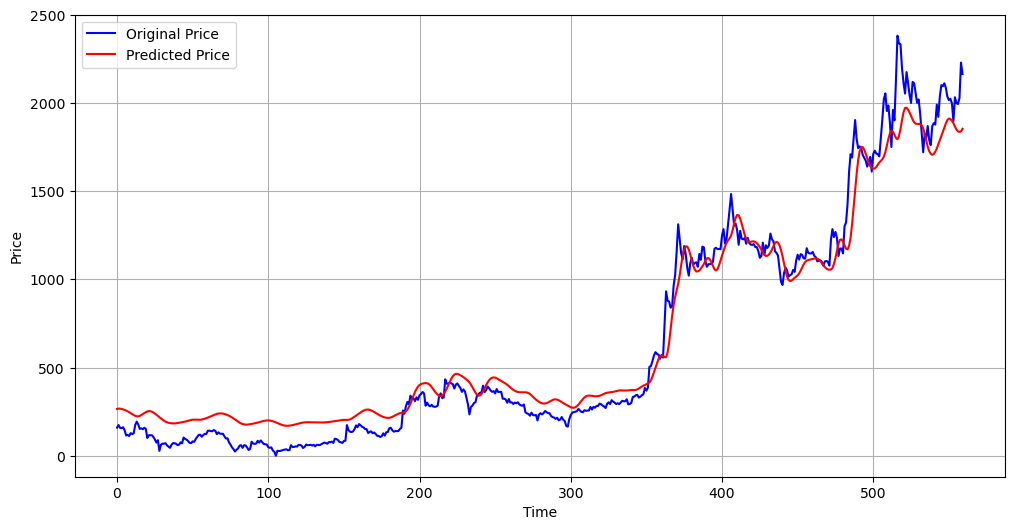

In [60]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()